In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
dataframe = pd.read_csv ('spg.csv')

**Visualization 1: Boxplot**

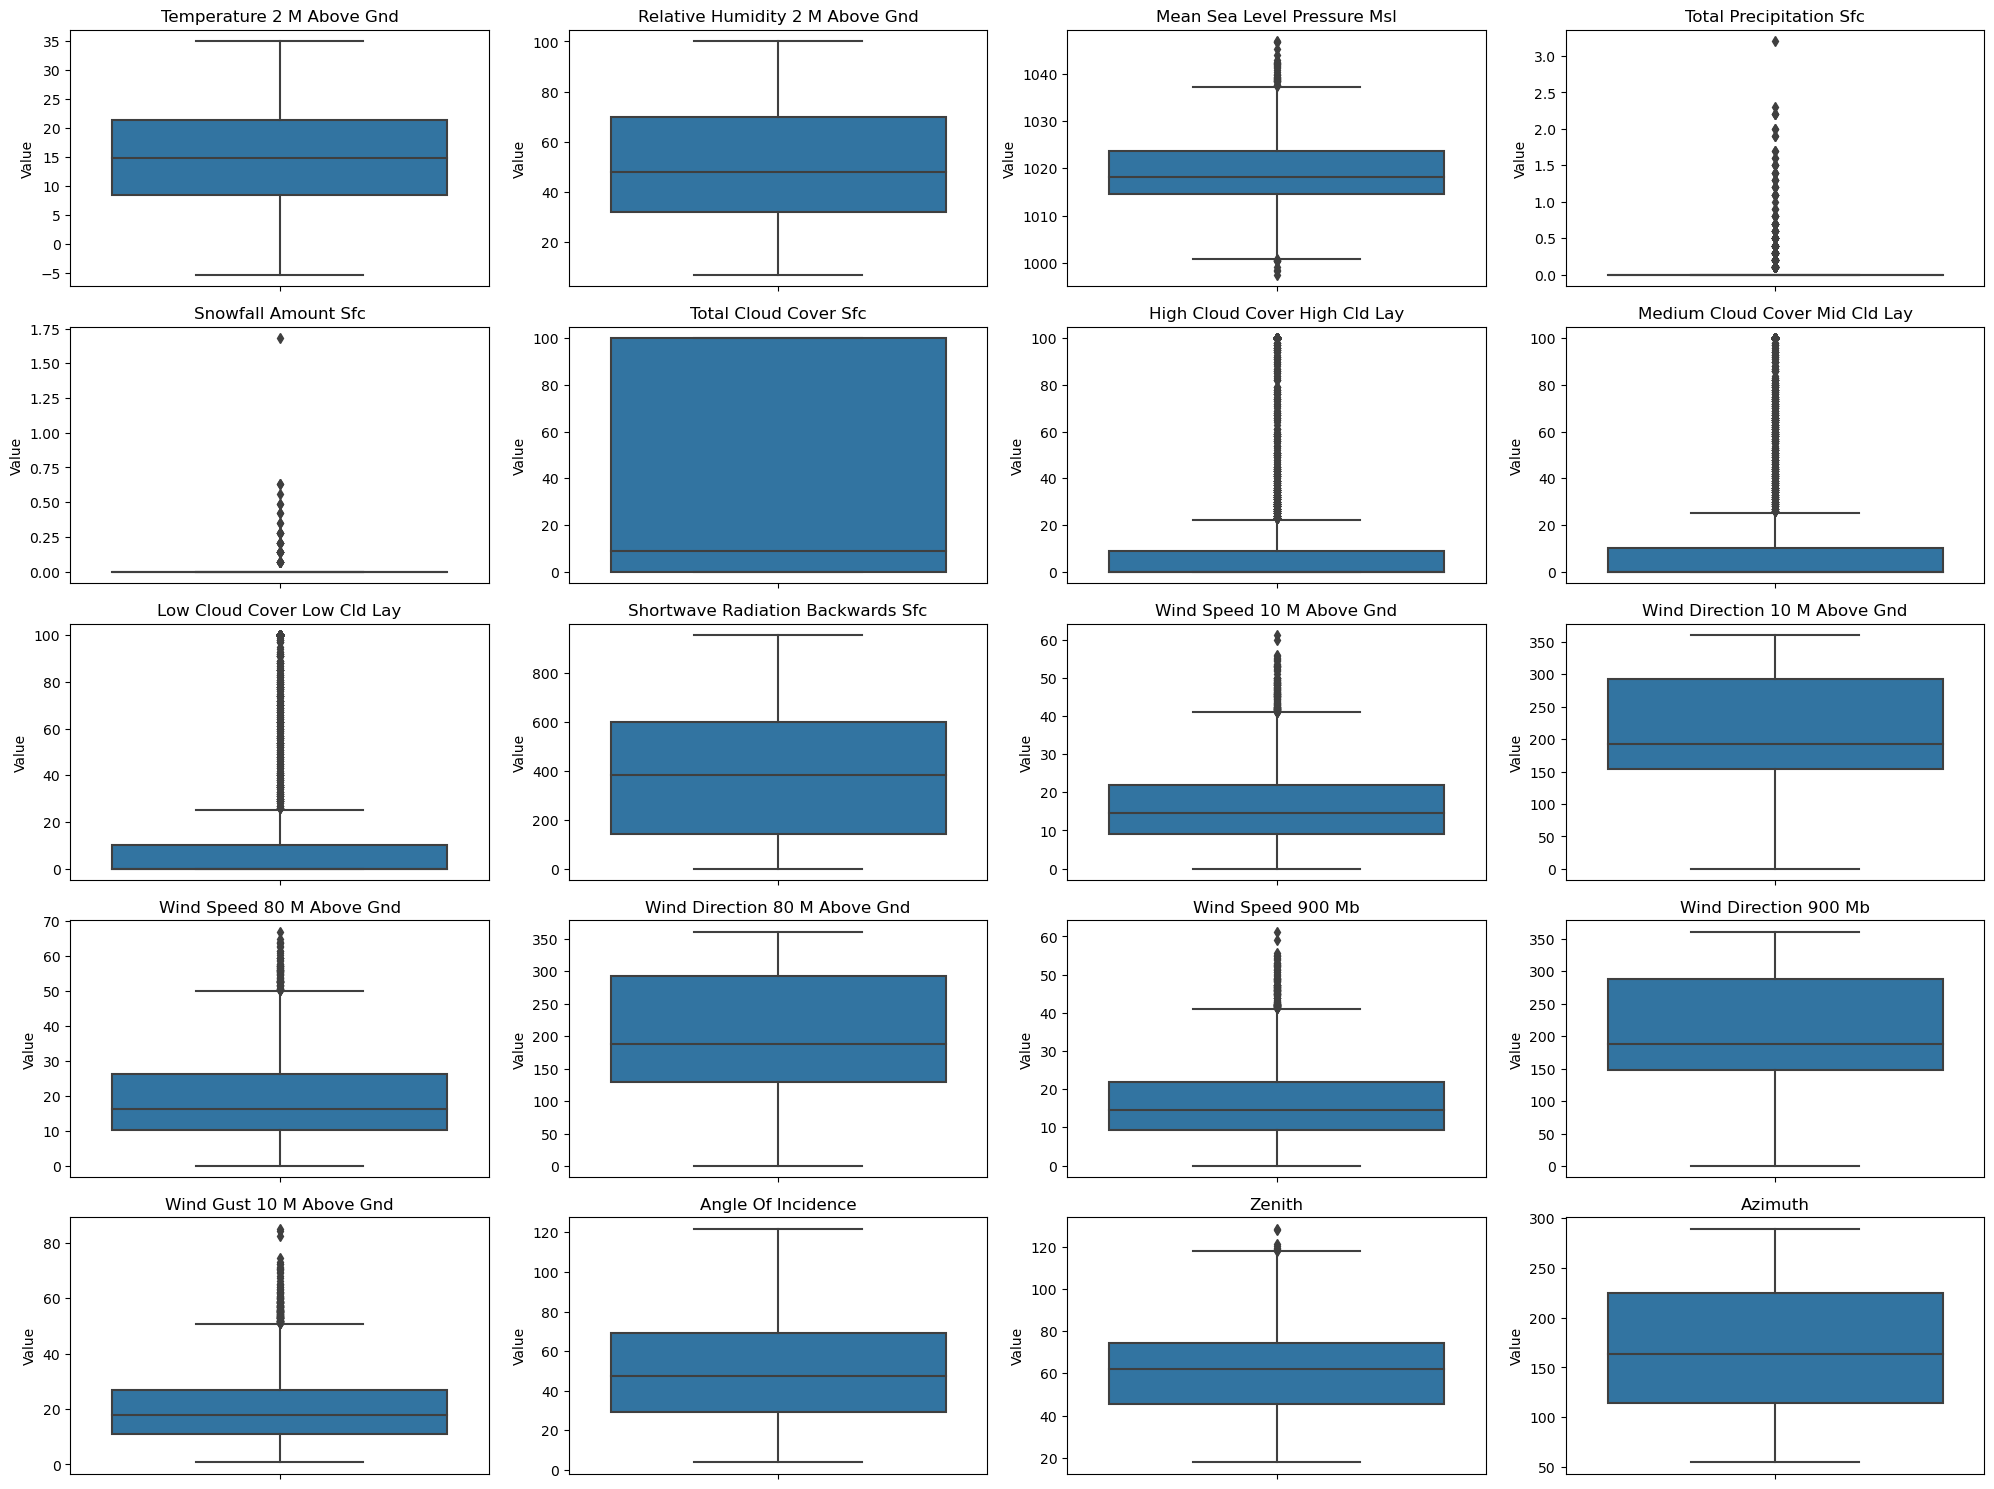

In [3]:
num_features = 20
features = dataframe.columns[:num_features]


plt.figure(figsize=(20, 15))


for i, feature in enumerate(features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(y=dataframe[feature])
    plt.title(feature.replace('_', ' ').title())
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

**Analysis and Decision on Outliers in Weather Dataset for Power Generation Prediction**

We conducted an in-depth analysis of a weather dataset, focusing on the role of outliers in the context of predicting generated power through machine learning models. The analysis combined descriptive statistics and box plot visualizations to assess the distribution and impact of outliers across various weather-related features.

**Key Observations**: Presence of Outliers in Specific Features:

**Weather Extremes**: Features such as total_precipitation_sfc and snowfall_amount_sfc showed significant outliers, likely reflecting rare, extreme weather conditions. Wind Speed Variations: Outliers in features like wind_gust_10_m_above_gnd and wind_speed_80_m_above_gnd indicated instances of unusually high wind speeds. General Distribution Across Features:

Other features, including temperature_2_m_above_gnd and relative_humidity_2_m_above_gnd, displayed more uniform distributions with fewer extreme outliers, suggesting a balanced representation of typical weather conditions.

**Minor Outliers**:

Some features exhibited minor outliers (e.g., angle_of_incidence), but these were not excessively pronounced. Decision and Rationale: Continuing with Outliers: After careful consideration, the decision is to retain the outliers within the dataset for the current phase of modeling. This approach acknowledges the potential value of the full range of data, including extreme conditions, in training the predictive model.

Informed by Context and Goals: This decision is guided by the understanding that the predictive model aims to capture a comprehensive picture of weather impacts on power generation, encompassing both typical and extreme conditions.

**Future Reassessment**: While we proceed with the outliers at present, we remain open to revisiting this decision in later stages, especially after evaluating the initial model's performance and its ability to generalize across different weather scenarios.

# Next Step: Concrete plans and goals for the next month

Among our 20 features, several lack positive covariance, meaning they don't move together in a positive direction. To streamline and simplify our dataset, we're turning to PCA. This technique helps us reduce the number of dimensions by cleverly combining features, especially handy when some don't show positive relationships. With PCA, we aim to retain the key information while cutting down on unnecessary complexity. Additionally, we're incorporating hyperparameter tuning in our model building process to ensure optimal performance and accuracy.

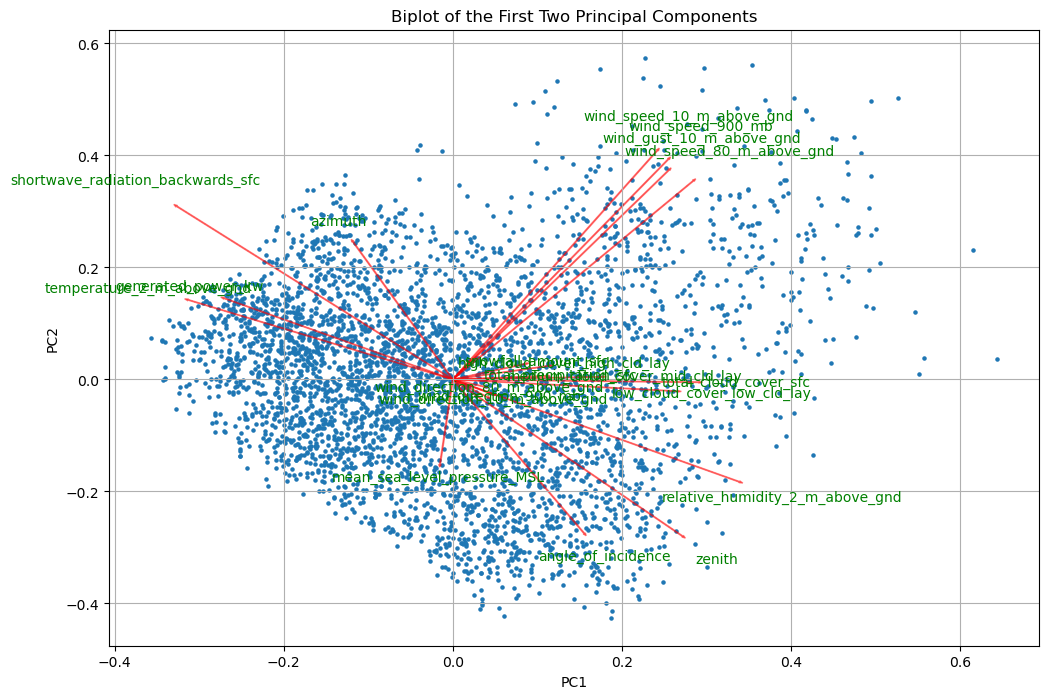

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataframe)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is not None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('Biplot of the First Two Principal Components')
    plt.grid()


plt.figure(figsize=(12, 8))
biplot(pca_data[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=dataframe.columns)
plt.show()